# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem definition
In a statment,
> Given clinical parameters about a patien, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There os also a version of it available on Kaggle. 
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 90% accuracy at predicting whether or not a patient has a heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where to find different information about each of the features in the data.

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We are going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [79]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [80]:
df = pd.read_csv("heart-disease.csv", index_col=0)
df.shape # (rows, columns)

(303, 14)

## Data exploration (EDA)

The goal is to find out more about the data and become a subject matter expert on it

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of the data?

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [82]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no
302,57,female,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,no


In [83]:
df['target'].value_counts()

target
yes    165
no     138
Name: count, dtype: int64

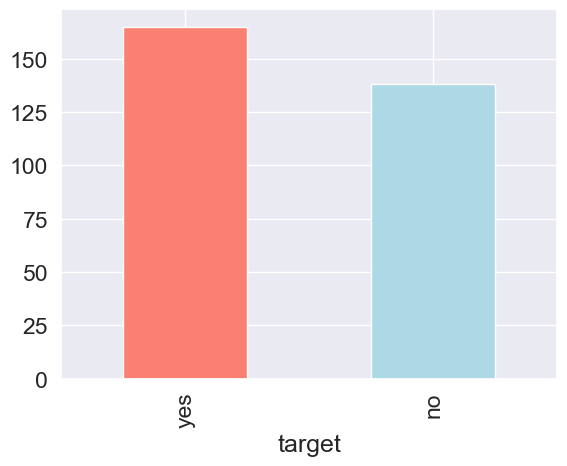

In [84]:
df['target'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [85]:
# Remapping Values: Assuming your DataFrame is called df and the column name is 'column_name'
# df['column_name'] = df['column_name'].map({'yes': 1, 'no': 0})
df.target = df.target.map({'yes': 1, 'no': 0})
# df.target

In [86]:
df.sex = df.sex.map({'male': 1, 'female': 0})
df.sex

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.5 KB


In [88]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
# Drop rows with null values
df.dropna(inplace=True)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [90]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.348123,0.689420,0.965870,131.679181,246.177474,0.146758,0.518771,149.880546,0.331058,1.054266,1.392491,0.730375,2.320819,0.546075
std,9.182042,0.463523,1.033114,17.658077,51.405545,0.354470,0.527162,22.638525,0.471399,1.173169,0.618946,1.029862,0.613331,0.498724
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,167.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [91]:
df.sex.value_counts()

sex
1    202
0     91
Name: count, dtype: int64

In [92]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,23,110
1,68,92


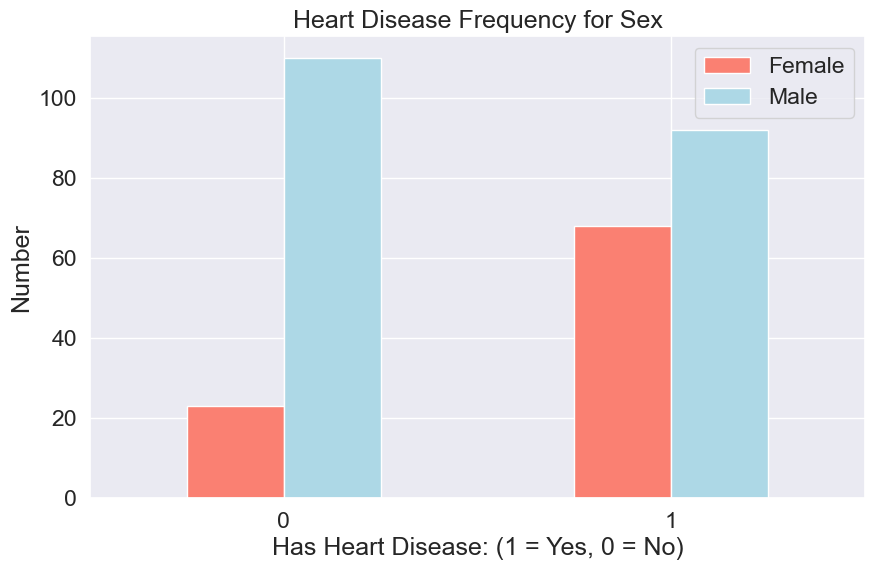

In [93]:
# Create a plot of the crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Has Heart Disease: (1 = Yes, 0 = No)")\

plt.ylabel("Number");
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [94]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


### Age vs. Max Heart Rate for Heart Disease

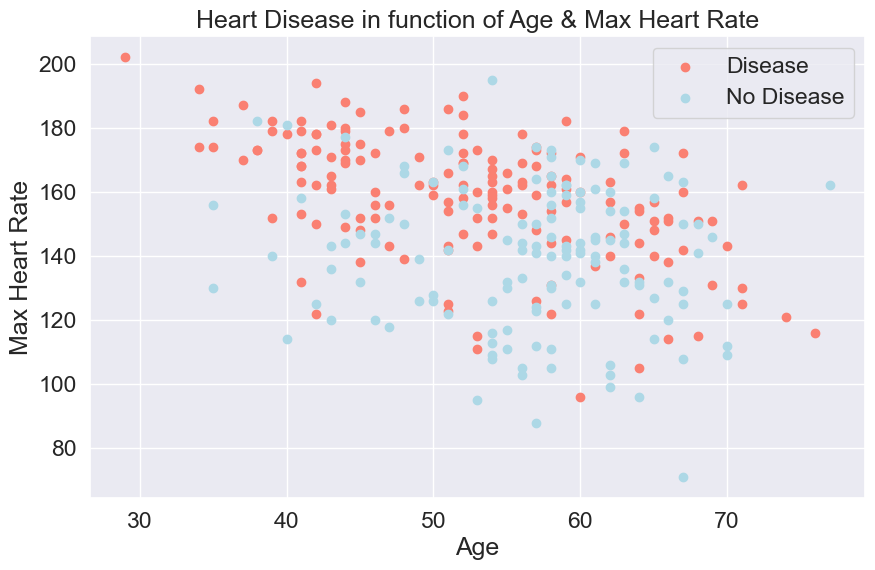

In [95]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

plt.title("Heart Disease in function of Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

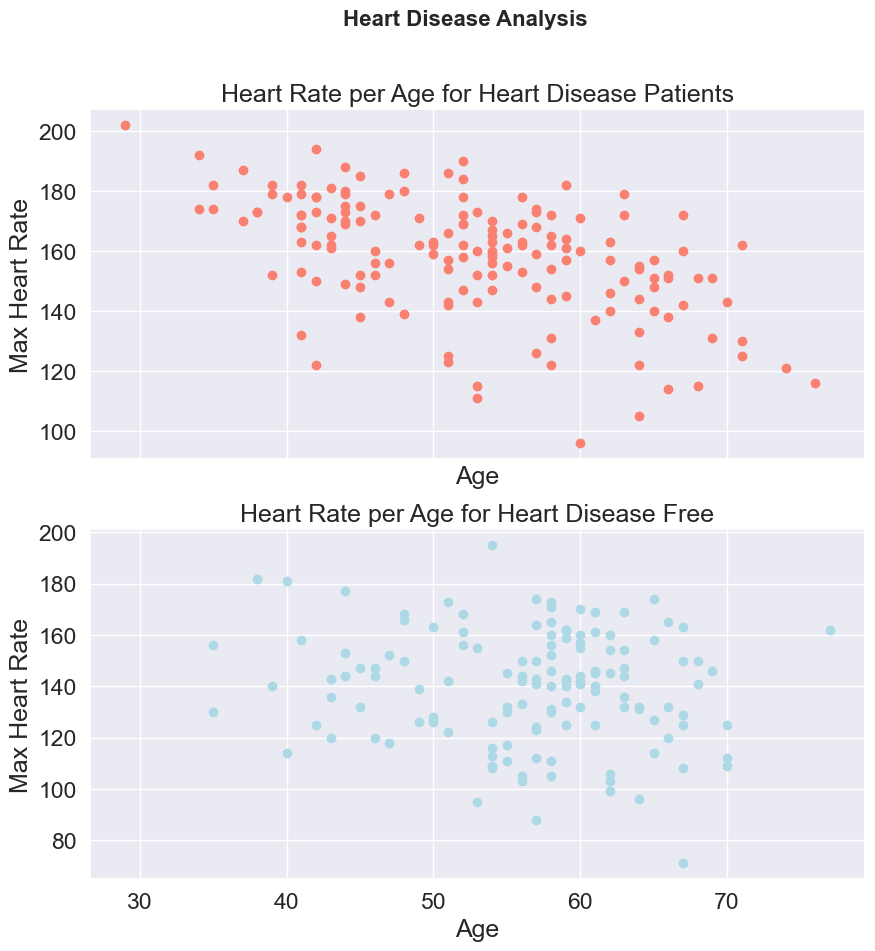

In [96]:
# Sublot of chol / age, thatlach /age

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True);

# Ax0
# PLot the data
scatter = ax0.scatter(df.age[df.target==1],
                      df.thalach[df.target==1],
                      c="salmon");

# Customize the plot
ax0.set(title="Heart Rate per Age for Heart Disease Patients", xlabel="Age", ylabel='Max Heart Rate');

# Add legends
# ax0.legend(*scatter0.legend_elements(), title="Target");


# Ax1
# PLot the data
scatter = ax1.scatter(df.age[df.target==0],
                      df.thalach[df.target==0],
                      c="lightblue");

# Customize the plot
ax1.set(title="Heart Rate per Age for Heart Disease Free", xlabel="Age", ylabel='Max Heart Rate');

# Add legends
# ax1.legend(*scatter1.legend_elements(), title="Target");

# Add a horizontal line
# ax1.axhline(over_50['thalach'].mean(), linestyle='--')

# Add a title to the entire figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

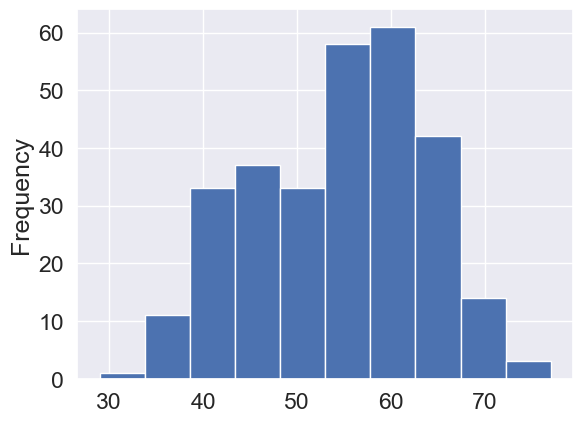

In [97]:
# Check the dustribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type
**cp - chest pain type**
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [98]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,101,37
1,9,41
2,16,66
3,7,16


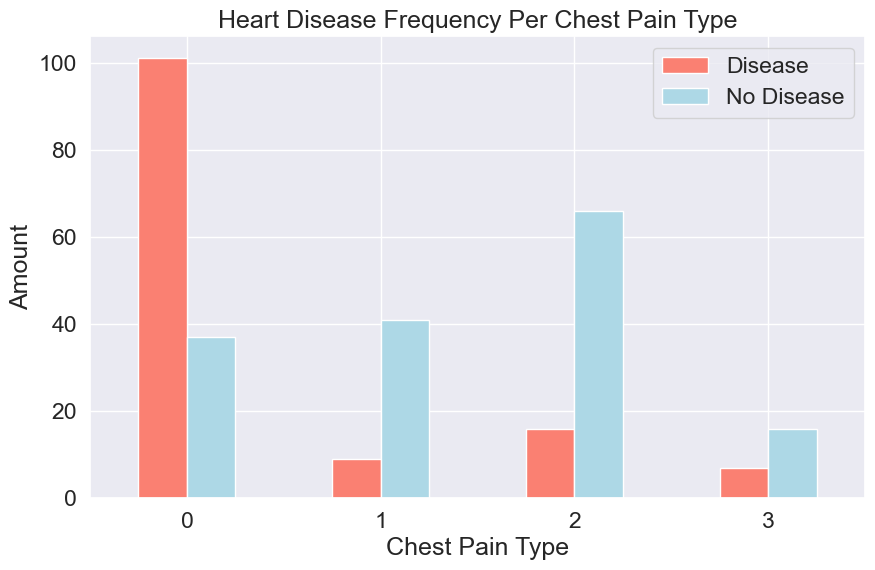

In [99]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=0)
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"]);

In [100]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [101]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.104863,-0.070586,0.276586,0.216155,0.127349,-0.119509,-0.396884,0.095919,0.211278,-0.167542,0.280493,0.067060,-0.215905
sex,-0.104863,1.000000,-0.043666,-0.068282,-0.189984,0.028242,-0.053143,-0.045322,0.143038,0.099115,-0.027255,0.103767,0.219176,-0.271211
cp,-0.070586,-0.043666,1.000000,0.051210,-0.091003,0.097889,0.045198,0.302782,-0.391609,-0.153591,0.122779,-0.182492,-0.171826,0.441747
trestbps,0.276586,-0.068282,0.051210,1.000000,0.135529,0.168406,-0.102731,-0.028102,0.072459,0.193254,-0.115657,0.096166,0.073411,-0.139090
chol,0.216155,-0.189984,-0.091003,0.135529,1.000000,0.026193,-0.166307,-0.038738,0.071904,0.066434,-0.026953,0.089595,0.106809,-0.103311
fbs,0.127349,0.028242,0.097889,0.168406,0.026193,1.000000,-0.078938,0.001339,0.036164,0.009607,-0.060520,0.118146,-0.012527,-0.028695
restecg,-0.119509,-0.053143,0.045198,-0.102731,-0.166307,-0.078938,1.000000,0.038211,-0.073327,-0.051767,0.087550,-0.069496,-0.018690,0.143242
thalach,-0.396884,-0.045322,0.302782,-0.028102,-0.038738,0.001339,0.038211,1.000000,-0.395491,-0.347278,0.379258,-0.207472,-0.099342,0.411950
exang,0.095919,0.143038,-0.391609,0.072459,0.071904,0.036164,-0.073327,-0.395491,1.000000,0.286938,-0.259066,0.121005,0.199949,-0.451127
oldpeak,0.211278,0.099115,-0.153591,0.193254,0.066434,0.009607,-0.051767,-0.347278,0.286938,1.000000,-0.572282,0.225590,0.206558,-0.440061


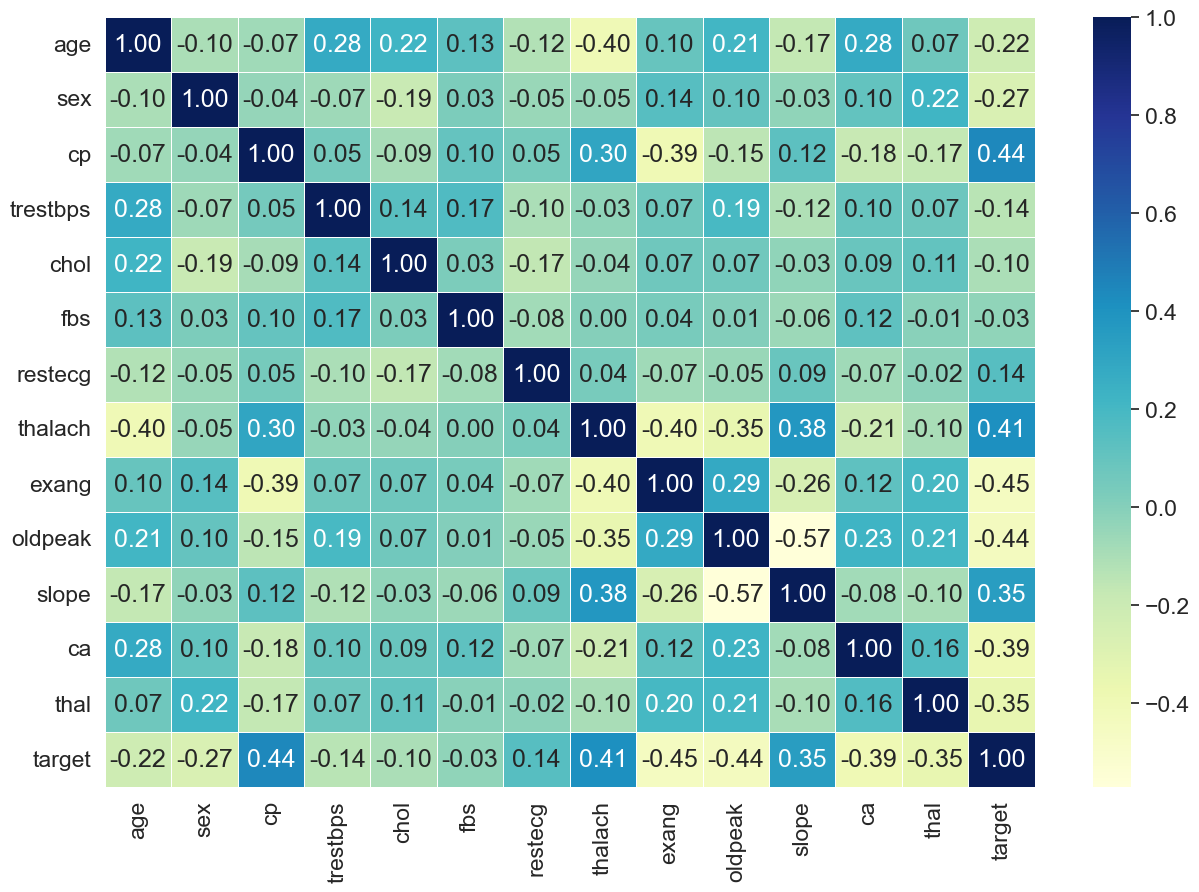

In [102]:
# Visulize the correlation matrix using heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## 5. Modelling

In [103]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [104]:
# Split data into X & y
X = df.drop("target", axis=1)

y = df['target']

In [105]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124.0,197.0,0,1,136.0,1,0.0,1,0,2
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3


In [106]:
y

0      1
1      1
2      1
3      1
5      1
      ..
296    0
298    0
299    0
300    0
302    0
Name: target, Length: 293, dtype: int64

In [107]:
# Split data into train & test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,63,1,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3
236,58,1,0,125.0,300.0,0,0,171.0,0,0.0,2,2,3
233,64,1,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2
76,51,1,2,125.0,245.0,1,0,166.0,0,2.4,1,0,2
27,51,1,2,110.0,175.0,0,1,123.0,0,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,60,1,2,140.0,185.0,0,0,155.0,0,3.0,1,0,2
74,43,0,2,122.0,213.0,0,1,165.0,0,0.2,1,0,2
110,64,0,0,180.0,325.0,0,1,154.0,1,0.0,2,0,2
278,58,0,1,136.0,319.0,1,0,152.0,0,0.0,2,2,2


In [109]:
y_train

217    0
236    0
233    0
76     1
27     1
      ..
194    0
74     1
110    1
278    0
106    1
Name: target, Length: 234, dtype: int64

Now we have got the data split int training and test sets, it is time to build a machine learning model

We will train it (find the patterns) on the training set

And we will test it on the test set

We will try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [110]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)

    # Make a dict to keep model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and appened its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [111]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

D:\Minor\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

### Model Comparison

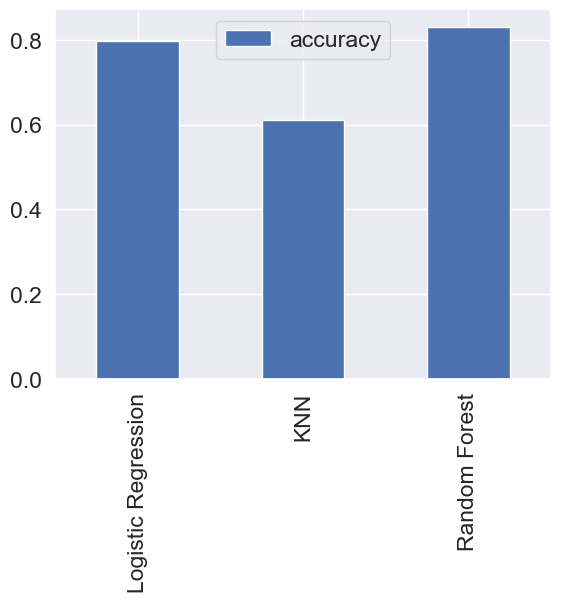

In [112]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model... and we know a model's first predictions are not always what we should base our next setps off. 
What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confussion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning (by hand)

In [113]:
# Tuning KNN 
train_scores = []
test_scores = []

# Create a list of different values for n neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through the different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training score list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))

In [114]:
test_scores

[0.6271186440677966,
 0.576271186440678,
 0.6440677966101694,
 0.6440677966101694,
 0.6101694915254238,
 0.6610169491525424,
 0.6779661016949152,
 0.6440677966101694,
 0.6440677966101694,
 0.6610169491525424,
 0.7288135593220338,
 0.6779661016949152,
 0.6949152542372882,
 0.711864406779661,
 0.711864406779661,
 0.711864406779661,
 0.6949152542372882,
 0.711864406779661,
 0.7288135593220338,
 0.7288135593220338]

Maximum KNN score on the test data: 72.88%


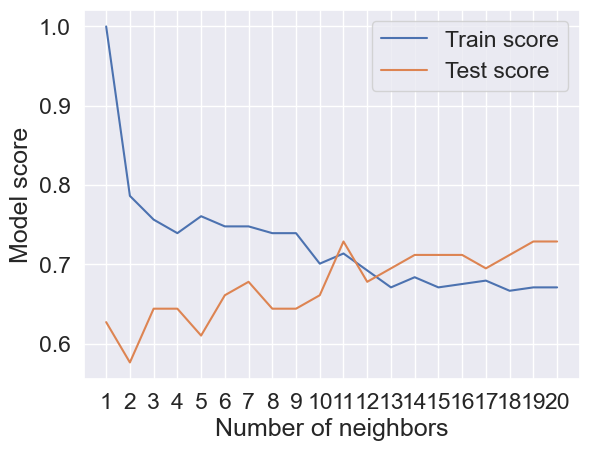

In [115]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning with RandomizedSearchCV

We will tune :
* LogisticRegression
* RandomForestClassifier
 
Using RandomizedSearchCV

In [116]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV..

In [117]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisicRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [118]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [119]:
rs_log_reg.score(X_test, y_test)

0.8135593220338984

Now we tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [120]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [121]:
# Find the best hyperparamters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [122]:
# Evaluate the randomized search for RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8305084745762712

In [123]:
model_scores

{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

**There are 3 ways to do hyperparameter tuning:**
1. Manually
2. RandmizedSeachCV
3. GridSearchCV

### Hyperparameter Tuning with GridSearchCV
1. Logistic Regression.
2. RandomForestClassifier.

In [124]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup frid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,
                           verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [125]:
# Find the best hyperparameter for LogisticRegression
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [126]:
# Evaluate the grid search for LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.7966101694915254

In [127]:
model_scores

{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

In [163]:
np.random.seed(42)

# Different hyperparameters for our RandomForestClassifier model
rf_grid1 = {"n_estimators": [50, 100, 150],
           "max_depth": [None, 10, 20],
           "min_samples_split": [2, 5, 10],
           "min_samples_leaf": [3, 4, 5],
           "random_state": [42]}

gs_rf1 = GridSearchCV(RandomForestClassifier(),
                     rf_grid1,
                     cv=5,
                     verbose=True)

gs_rf1.fit(X_train, y_train)

# RandomForestClassifier()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150], 'random_state': [42]},
             verbose=True)

In [164]:
gs_rf1.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [165]:
gs_rf1.score(X_test, y_test)

0.847457627118644

In [162]:
model_scores

{'Logistic Regression': 0.7966101694915254,
 'KNN': 0.6101694915254238,
 'Random Forest': 0.8305084745762712}

In [132]:
np.arange(100, 300, 100)

array([100, 200])

### Evaluating out tuned machine learning classifier , beyond accuracy

* ROC curve & AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

& use cross-validation where possible

To make comparisons & evaluate out trained model, first we need to meke predictions.

In [133]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [134]:
y_test

87     1
268    0
47     1
182    0
148    1
129    1
234    0
122    1
10     1
94     1
152    1
283    0
35     1
289    0
228    0
80     1
48     1
6      1
238    0
251    0
128    1
245    0
287    0
105    1
78     1
279    0
282    0
113    1
63     1
208    0
44     1
59     1
293    0
121    1
62     1
170    0
290    0
117    1
164    1
66     1
151    1
69     1
277    0
163    1
187    0
32     1
24     1
26     1
285    0
123    1
253    0
82     1
19     1
178    0
220    0
183    0
189    0
173    0
7      1
Name: target, dtype: int64

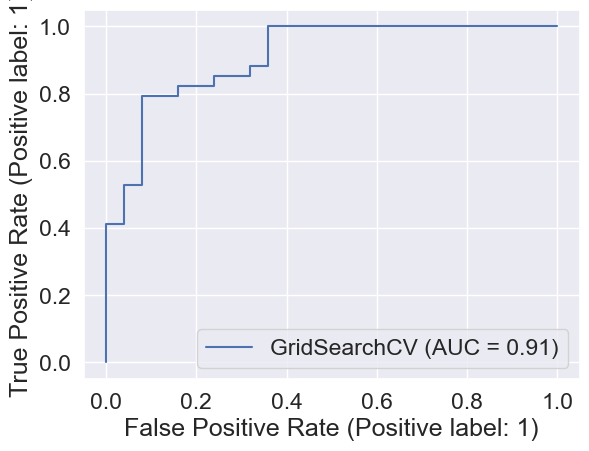

In [135]:
# The ROC curve is the plot of the true positive rate against the false positive rate at each threshold setting
# import ROC curve function from sktlearn.metrics module
# Plot ROC curve & calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [136]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[13 12]
 [ 0 34]]


In [137]:
sns.set_theme(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a styled confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted lable")
    plt.ylabel("True lable")

    plt.show()

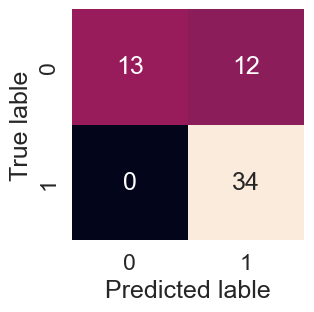

In [138]:
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get classification report as wel as cross-validated precision and f1-score.

1. **Precision** measures the proportion of true positive predictions among all positive predictions made by the model.

    **Precision = True Positives / (True Positives + False Positives)**

2. **Recall** (also known as sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positive instances in the dataset.

    **Recall = True Positives / (True Positives + False Negatives)**

3. **​F1-score** is a single metric conmbining both Precision and Recall. 

    **F1 = 2 * (Precision * Recall) / (Precision + Recall)**

In [139]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        25
           1       0.74      1.00      0.85        34

    accuracy                           0.80        59
   macro avg       0.87      0.76      0.77        59
weighted avg       0.85      0.80      0.78        59



### Calculate evaluation matrix using cross-validation
We are going to calculate precision, recall, and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [140]:
# Cheack best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [141]:
# Create a new calssifier with the best prameters